In [2]:
# Import required libraries
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Road Anomaly Detection Dataset Exploration

This notebook explores the HDF5 dataset for road anomaly detection. We'll examine the structure, contents, and characteristics of the data.

In [3]:
# Define dataset path
dataset_path = Path("../data/ROAD_dataset.h5")  # Adjust path as needed

# Check if file exists
if not dataset_path.exists():
    print(f"Dataset not found at {dataset_path}")
    print("Please update the path to your HDF5 file")
else:
    print(f"Dataset found at {dataset_path}")
    print(f"File size: {dataset_path.stat().st_size / (1024**2):.2f} MB")

Dataset found at ../data/ROAD_dataset.h5
File size: 3766.44 MB


In [4]:
# Explore HDF5 file structure
def explore_h5_structure(file_path, max_depth=3, current_depth=0):
    """Recursively explore HDF5 file structure"""
    if current_depth >= max_depth:
        return

    with h5py.File(file_path, 'r') as f:
        def print_structure(name, obj):
            indent = "  " * current_depth
            if isinstance(obj, h5py.Dataset):
                print(f"{indent}📊 Dataset: {name}")
                print(f"{indent}   Shape: {obj.shape}")
                print(f"{indent}   Type: {obj.dtype}")
                print(f"{indent}   Size: {obj.size} elements")
            elif isinstance(obj, h5py.Group):
                print(f"{indent}📁 Group: {name}")

        print("HDF5 File Structure:")
        print("=" * 50)
        f.visititems(print_structure)

# Explore the dataset structure
if dataset_path.exists():
    explore_h5_structure(dataset_path)

HDF5 File Structure:
📁 Group: anomaly_data
📁 Group: anomaly_data/first_order_data_loss
📊 Dataset: anomaly_data/first_order_data_loss/data
   Shape: (146, 256, 256, 4)
   Type: float32
   Size: 38273024 elements
📊 Dataset: anomaly_data/first_order_data_loss/frequency_band
   Shape: (146, 256, 256, 1)
   Type: float32
   Size: 9568256 elements
📊 Dataset: anomaly_data/first_order_data_loss/ids
   Shape: (146,)
   Type: |S100
   Size: 146 elements
📊 Dataset: anomaly_data/first_order_data_loss/labels
   Shape: (146,)
   Type: |S100
   Size: 146 elements
📊 Dataset: anomaly_data/first_order_data_loss/source
   Shape: (146,)
   Type: |S100
   Size: 146 elements
📁 Group: anomaly_data/first_order_high_noise
📊 Dataset: anomaly_data/first_order_high_noise/data
   Shape: (88, 256, 256, 4)
   Type: float32
   Size: 23068672 elements
📊 Dataset: anomaly_data/first_order_high_noise/frequency_band
   Shape: (88, 256, 256, 1)
   Type: float32
   Size: 5767168 elements
📊 Dataset: anomaly_data/first_order_

In [5]:
# Load and examine the main datasets
def load_datasets(file_path):
    """Load main datasets from HDF5 file"""
    datasets = {}

    with h5py.File(file_path, 'r') as f:
        print("Available datasets:")
        for key in f.keys():
            if isinstance(f[key], h5py.Dataset):
                datasets[key] = f[key][:]
                print(f"  - {key}: {f[key].shape}")
            elif isinstance(f[key], h5py.Group):
                print(f"  - {key} (group):")
                for subkey in f[key].keys():
                    if isinstance(f[key][subkey], h5py.Dataset):
                        datasets[f"{key}/{subkey}"] = f[key][subkey][:]
                        print(f"    - {subkey}: {f[key][subkey].shape}")

    return datasets

# Load the datasets
if dataset_path.exists():
    data = load_datasets(dataset_path)
    print(f"\nLoaded {len(data)} datasets")

Available datasets:
  - anomaly_data (group):
  - test_data (group):
    - data: (1000, 256, 256, 4)
    - frequency_band: (1000, 256, 256, 1)
    - ids: (1000,)
    - labels: (1000,)
    - source: (1000,)
  - train_data (group):
    - data: (3687, 256, 256, 4)
    - frequency_band: (3687, 256, 256, 1)
    - ids: (3687,)
    - labels: (3687,)
    - source: (3687,)

Loaded 10 datasets


In [7]:
# Quick dataset summary
def analyze_dataset(datasets):
    """Print basic dataset info"""
    for name, dataset in datasets.items():
        print(f"\n{name}:")
        print(f"Shape: {dataset.shape}")
        print(f"Type: {dataset.dtype}")

# Analyze data
if dataset_path.exists() and 'data' in locals():
    analyze_dataset(data)


test_data/data:
Shape: (1000, 256, 256, 4)
Type: float32

test_data/frequency_band:
Shape: (1000, 256, 256, 1)
Type: float32

test_data/ids:
Shape: (1000,)
Type: |S100

test_data/labels:
Shape: (1000,)
Type: |S100

test_data/source:
Shape: (1000,)
Type: |S100

train_data/data:
Shape: (3687, 256, 256, 4)
Type: float32

train_data/frequency_band:
Shape: (3687, 256, 256, 1)
Type: float32

train_data/ids:
Shape: (3687,)
Type: |S100

train_data/labels:
Shape: (3687,)
Type: |S100

train_data/source:
Shape: (3687,)
Type: |S100


## Data Visualization

Let's create visualizations to better understand the dataset characteristics.

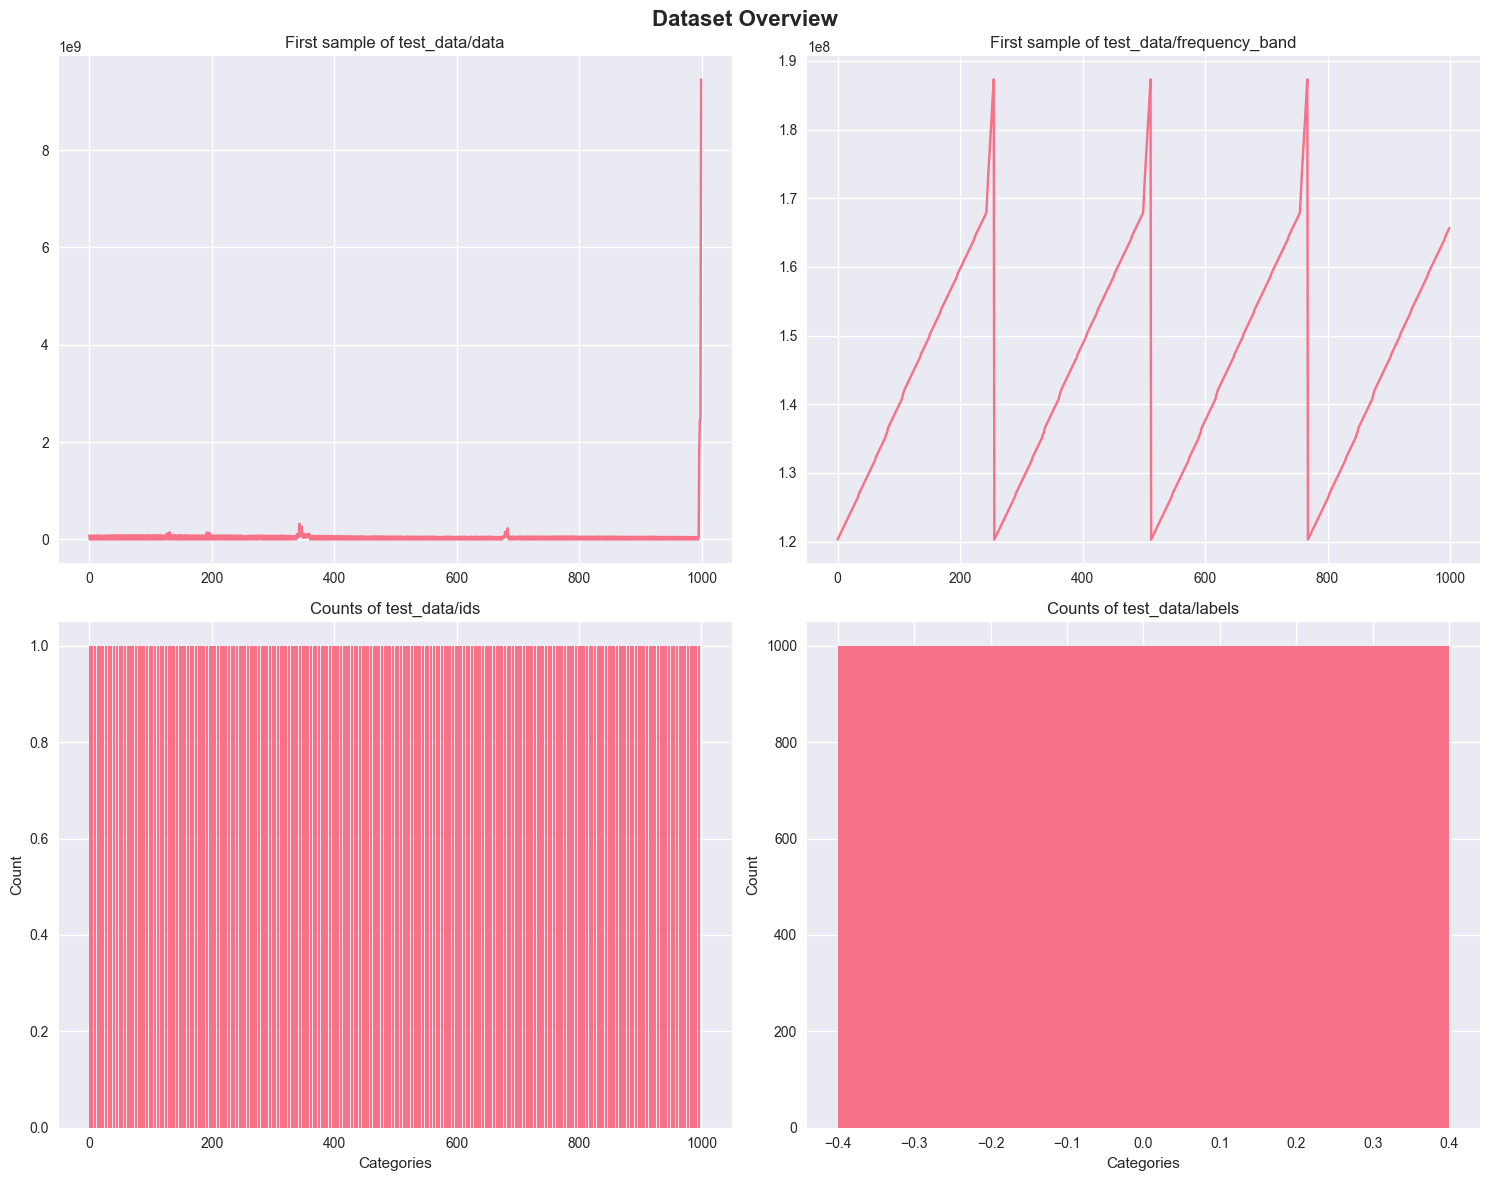

In [8]:
# Create visualizations based on data type and structure
def create_visualizations(datasets):
    """Create appropriate visualizations for the datasets"""

    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Dataset Overview', fontsize=16, fontweight='bold')

    plot_idx = 0
    for name, dataset in datasets.items():
        if plot_idx >= 4:
            break

        ax = axes[plot_idx // 2, plot_idx % 2]

        if dataset.ndim == 1:
            if np.issubdtype(dataset.dtype, np.number):
                # Histogram for 1D numerical data
                ax.hist(dataset, bins=50, alpha=0.7, edgecolor='black')
                ax.set_title(f'Distribution of {name}')
                ax.set_xlabel('Value')
                ax.set_ylabel('Frequency')
            else:
                # Bar plot for categorical data
                unique, counts = np.unique(dataset, return_counts=True)
                ax.bar(range(len(unique)), counts)
                ax.set_title(f'Counts of {name}')
                ax.set_xlabel('Categories')
                ax.set_ylabel('Count')

        elif dataset.ndim == 2:
            # Heatmap for 2D data (sample)
            sample_data = dataset[:min(100, dataset.shape[0]), :min(100, dataset.shape[1])]
            im = ax.imshow(sample_data, aspect='auto', cmap='viridis')
            ax.set_title(f'Heatmap of {name} (sample)')
            plt.colorbar(im, ax=ax)

        elif dataset.ndim >= 3:
            # Show first slice of multi-dimensional data
            if dataset.shape[0] > 0:
                sample_slice = dataset[0]
                if sample_slice.ndim == 2:
                    im = ax.imshow(sample_slice, aspect='auto', cmap='viridis')
                    ax.set_title(f'First slice of {name}')
                    plt.colorbar(im, ax=ax)
                else:
                    ax.plot(sample_slice.flatten()[:1000])  # Plot first 1000 points
                    ax.set_title(f'First sample of {name}')

        plot_idx += 1

    # Hide unused subplots
    for i in range(plot_idx, 4):
        axes[i // 2, i % 2].set_visible(False)

    plt.tight_layout()
    plt.show()

# Create visualizations
if dataset_path.exists() and 'data' in locals():
    create_visualizations(data)

In [9]:
# Correlation analysis (if applicable)
def correlation_analysis(datasets):
    """Perform correlation analysis on numerical datasets"""
    numerical_data = {}

    for name, dataset in datasets.items():
        if np.issubdtype(dataset.dtype, np.number) and dataset.ndim <= 2:
            if dataset.ndim == 1:
                numerical_data[name] = dataset
            elif dataset.ndim == 2 and dataset.shape[1] < 20:  # Avoid too many features
                for i in range(dataset.shape[1]):
                    numerical_data[f"{name}_col_{i}"] = dataset[:, i]

    if len(numerical_data) > 1:
        # Create DataFrame for correlation analysis
        min_length = min(len(data) for data in numerical_data.values())
        truncated_data = {name: data[:min_length] for name, data in numerical_data.items()}
        df = pd.DataFrame(truncated_data)

        # Correlation matrix
        plt.figure(figsize=(12, 8))
        correlation_matrix = df.corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                   square=True, fmt='.2f')
        plt.title('Correlation Matrix of Numerical Features')
        plt.tight_layout()
        plt.show()

        # Print high correlations
        print("\nHigh Correlations (|r| > 0.7):")
        print("=" * 40)
        high_corr = []
        for i in range(len(correlation_matrix.columns)):
            for j in range(i+1, len(correlation_matrix.columns)):
                corr_val = correlation_matrix.iloc[i, j]
                if abs(corr_val) > 0.7:
                    high_corr.append((correlation_matrix.columns[i],
                                    correlation_matrix.columns[j],
                                    corr_val))

        if high_corr:
            for feat1, feat2, corr in high_corr:
                print(f"{feat1} <-> {feat2}: {corr:.3f}")
        else:
            print("No high correlations found.")

# Perform correlation analysis
if dataset_path.exists() and 'data' in locals():
    correlation_analysis(data)

## Missing Data Analysis

Check for missing or invalid data in the dataset.

In [11]:
# Missing data analysis
def missing_data_analysis(datasets):
    """Analyze missing or invalid data"""
    print("Missing Data Analysis:")
    print("=" * 50)

    for name, dataset in datasets.items():
        print(f"\n📊 {name}:")
        total = dataset.size

        # Get counts in one pass through data
        if np.issubdtype(dataset.dtype, np.number):
            mask = np.isnan(dataset) | np.isinf(dataset)
            invalid = np.count_nonzero(mask)
            print(f"   Invalid values: {invalid} ({invalid/total*100:.2f}%)")
        elif dataset.dtype.kind in ['U', 'S']:
            empty = np.count_nonzero(dataset == '')
            print(f"   Empty strings: {empty} ({empty/total*100:.2f}%)")

# Analyze missing data
if dataset_path.exists() and 'data' in locals():
    missing_data_analysis(data)

Missing Data Analysis:

📊 test_data/data:
   Invalid values: 0 (0.00%)

📊 test_data/frequency_band:
   Invalid values: 0 (0.00%)

📊 test_data/ids:
   Empty strings: 0 (0.00%)

📊 test_data/labels:
   Empty strings: 0 (0.00%)

📊 test_data/source:
   Empty strings: 0 (0.00%)

📊 train_data/data:
   Invalid values: 0 (0.00%)

📊 train_data/frequency_band:
   Invalid values: 0 (0.00%)

📊 train_data/ids:
   Empty strings: 0 (0.00%)

📊 train_data/labels:
   Empty strings: 0 (0.00%)

📊 train_data/source:
   Empty strings: 0 (0.00%)


## Summary and Recommendations

Based on the dataset exploration, here are the key findings and recommendations for the road anomaly detection project.

In [12]:
# Generate summary report
def generate_summary(datasets):
    """Generate a comprehensive summary of the dataset"""
    print("DATASET SUMMARY REPORT")
    print("=" * 60)

    total_memory = sum(dataset.nbytes for dataset in datasets.values()) / (1024**2)
    print(f"📁 Total datasets: {len(datasets)}")
    print(f"💾 Total memory usage: {total_memory:.2f} MB")

    print(f"\n📊 Dataset Breakdown:")
    for name, dataset in datasets.items():
        print(f"   • {name}: {dataset.shape} ({dataset.dtype})")

    # Data quality assessment
    print(f"\n🔍 Data Quality Assessment:")
    quality_issues = []

    for name, dataset in datasets.items():
        if np.issubdtype(dataset.dtype, np.number):
            if np.any(np.isnan(dataset)):
                quality_issues.append(f"NaN values in {name}")
            if np.any(np.isinf(dataset)):
                quality_issues.append(f"Infinite values in {name}")

    if quality_issues:
        print("   ⚠️  Issues found:")
        for issue in quality_issues:
            print(f"      - {issue}")
    else:
        print("   ✅ No major data quality issues detected")

    print(f"\n💡 Recommendations:")
    print("   1. Verify data preprocessing steps")
    print("   2. Consider feature scaling if needed")
    print("   3. Handle any missing/invalid values")
    print("   4. Split data into train/validation/test sets")
    print("   5. Consider data augmentation techniques")

# Generate final summary
if dataset_path.exists() and 'data' in locals():
    generate_summary(data)
else:
    print("Please update the dataset_path variable with the correct path to your HDF5 file.")

DATASET SUMMARY REPORT
📁 Total datasets: 10
💾 Total memory usage: 5860.09 MB

📊 Dataset Breakdown:
   • test_data/data: (1000, 256, 256, 4) (float32)
   • test_data/frequency_band: (1000, 256, 256, 1) (float32)
   • test_data/ids: (1000,) (|S100)
   • test_data/labels: (1000,) (|S100)
   • test_data/source: (1000,) (|S100)
   • train_data/data: (3687, 256, 256, 4) (float32)
   • train_data/frequency_band: (3687, 256, 256, 1) (float32)
   • train_data/ids: (3687,) (|S100)
   • train_data/labels: (3687,) (|S100)
   • train_data/source: (3687,) (|S100)

🔍 Data Quality Assessment:
   ✅ No major data quality issues detected

💡 Recommendations:
   1. Verify data preprocessing steps
   2. Consider feature scaling if needed
   3. Handle any missing/invalid values
   4. Split data into train/validation/test sets
   5. Consider data augmentation techniques
